In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Função para gerar a série temporal
def generate_series(length):
    series = []
    for n in range(length):
        series.append(np.sqrt(1 + np.sin(n + np.sin(n)**2)))
    return series

# Gerar a série temporal
length = 200
series = generate_series(length)

# Preparar os dados de entrada e saída
X = np.array(series[:-1]).reshape(-1, 1)  # Dados de entrada (x(n))
y = np.array(series[1:]).reshape(-1, 1)   # Saída esperada (x(n+1))

# Definir a arquitetura da rede neural
model = Sequential([
    Dense(50, activation='relu', input_shape=(1,)),
    Dense(10, activation='relu'),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Fazer previsões
predictions = model.predict(X)

# Calcular o erro de predição
prediction_errors = y - predictions

7/7 [==============================] - 0s 1ms/step


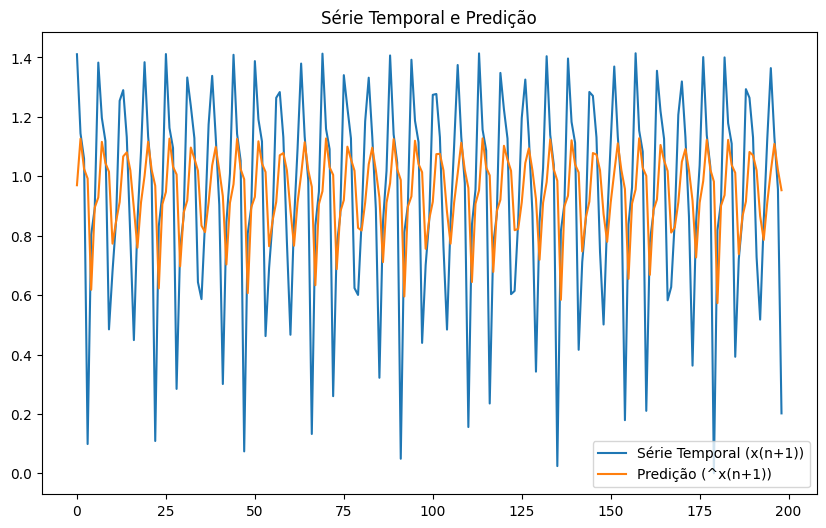

In [12]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(series[1:], label='Série Temporal (x(n+1))')
plt.plot(predictions, label='Predição (^x(n+1))')
plt.title('Série Temporal e Predição')
plt.legend()


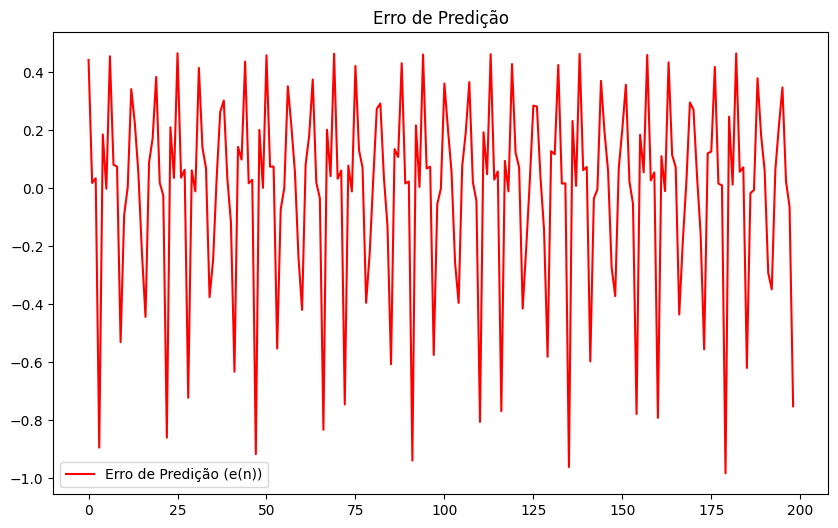

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_errors, label='Erro de Predição (e(n))', color='red')
plt.title('Erro de Predição')
plt.legend()

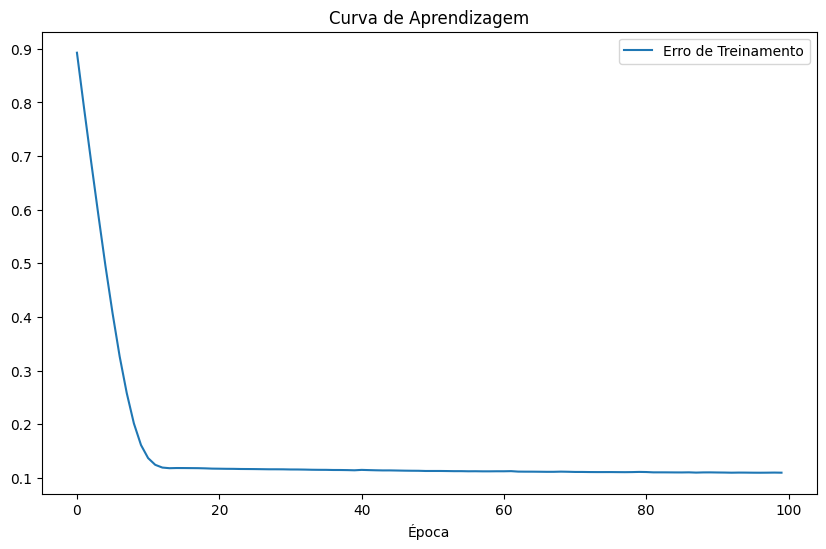

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.title('Curva de Aprendizagem')
plt.xlabel('Época')
plt.legend()